# Importando Bibliotecas e Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados_casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

# Analisando Dados Iniciais

In [3]:
dados_casos.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029


In [4]:
dados_casos.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
131,NaN,Gabon,-0.803700,11.60940,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37830,37830,38039,38039,38039,38039,38039,39910,39910,39910,41073,41798,41798,41798,42640,42640,42640,42640,43939,43939,43939,44409,44409,44806,44806,45152,45152,45152,45405,45405,45405,45663,45909,45909,45909,46198,46198,46469,46469,46722
227,NaN,Serbia,44.016500,21.00590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1282461,1284757,1286025,1287202,1288395,1289493,1290469,1291718,1293394,1295198,1297147,1299339,1300949,1302856,1305621,1310845,1318333,1327455,1334994,1342646,1350595,1359544,1359544,1386114,1399867,1412588,1425147,1436395,1449192,1467198,1484516,1501621,1518024,1532741,1544900,1559946,1579847,1579847,1616584,1633868
28,NaN,Bosnia and Herzegovina,43.915900,17.67910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,285133,285724,286276,286792,287276,287276,287276,288128,288876,289676,290471,291313,291313,291313,291313,293684,295240,297333,297333,297333,297333,302587,304856,307433,310023,313185,313185,313185,317692,321034,324026,326995,329569,329569,329569,334141,336680,339281,341913,343986
241,NaN,Suriname,3.919300,-56.02780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,51416,51498,51518,51542,51563,51578,51578,51683,51791,52031,52269,52446,52612,52895,53640,54460,55376,56041,56792,57339,57705,58714,59776,60823,61708,62734,63443,63878,65282,66633,67768,68560,69275,69741,70074,70937,71629,72088,72548,72943
159,NaN,Kiribati,-3.370400,-168.73400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,37,37,39,39,39,59,66,116,181,201
73,Inner Mongolia,China,44.093500,113.94480,0,0,1,7,7,11,15,16,19,20,23,27,34,35,42,46,50,52,54,58,58,60,61,65,68,70,72,73,75,75,75,75,75,75,75,75,...,1185,1185,1185,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1186,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191,1191
44,New Brunswick,Canada,46.565300,-66.46190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10672,10828,11065,11322,11587,11587,11587,12226,12532,13018,13590,14272,14272,14272,16820,17566,18345,19017,19857,20278,20479,20699,20890,21249,21553,21979,22388,22768,23173,23503,24001,24489,25003,25465,25465,26391,26741,26741,27649,28045
237,NaN,Spain,40.463667,-3.74922,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,...,5535231,5585054,5645095,5718007,5718007,5718007,5718007,5932626,6032297,6133057,6294745,6294745,6294745,6294745,6667511,6785286,6922466,6922466,7164906,7164906,7164906,7457300,7592242,7771367,7930528,8093036,8093036,8093036,8424503,8518975,8676916,8834363,8975458,8975458,8975458,9280890,9395767,9529320,9660208,9779130
87,Tibet,China,31.692700,88.09240,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
231,NaN,Slovakia,48.669000,19.69900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1327031,1332198,1334906,1342324,1347874,1349146,1349806,1351450,1357165,1363478,1367361,1371082,1374354,1374850,1376559,1381175,1385760,1389546,1391061,1394685,1397257,

In [54]:
dados_casos["Country/Region"].unique() 
#Descobrindo nomes únicos que contém na coluna países ou região
#O país de interesse para o estudo (Brasil) é escrito como Brazil

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

# Tratamento dos Dados

In [55]:
casos_confirmados_paises = dados_casos.groupby("Country/Region").sum()
#Agrupando os dados antes separados por provincia ou estado, somando a quantidade para cada país

In [7]:
casos_confirmados_paises.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Central African Republic,6.611100,20.939400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11961,11961,11961,11961,11961,11961,11961,12163,12163,12163,12163,12163,12163,12163,12163,12163,12454,12454,12454,12454,12454,12454,12650,12650,12650,13319,13319,13319,13319,13319,13319,13509,13509,13611,13611,13611,13840,13840,13898,13898
Peru,-9.190000,-75.015200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2265320,2267715,2269497,2271549,2272885,2278807,2279299,2281362,2283474,2287494,2292254,2296831,2301177,2302678,2304674,2309856,2318543,2329717,2342550,2358685,2375813,2388289,2412577,2440349,2473709,2512789,2562534,2606126,2631826,2668224,2723166,2780049,2839519,2894215,2946151,2976260,3020756,3020756,3120401,3120401
Bahrain,26.027500,50.550000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,33,33,36,...,278600,278714,278875,279056,279277,279518,279805,280109,280482,280876,281406,282062,282677,283344,284224,285448,286529,287939,289454,290878,292572,294466,296253,298542,300631,302872,305414,308008,310906,313925,317380,320688,324304,327466,330621,334164,338524,343400,348655,355314
Uzbekistan,41.377491,64.585262,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,197268,197392,197566,197753,197918,198099,198242,198387,198487,198626,198769,198903,199030,199118,199182,199271,199361,199507,199758,199972,200341,200730,201155,202473,202473,203297,204173,205085,206122,207057,208271,209578,210899,212289,213767,215063,216186,217360,218477,219663
Chile,-35.675100,-71.543000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,...,1792902,1793786,1794750,1796232,1797631,1799125,1800280,1801033,1801795,1802891,1804682,1806494,1808398,1810302,1811297,1812348,1814188,1817300,1821071,1825417,1829437,1833478,1837390,1842218,1849465,1857764,1867101,1876610,1885540,1893115,1902657,1916522,1934204,1949675,1965393,1984190,2001346,2020082,2045874,2075703
Cote d'Ivoire,7.540000,-5.547100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,62166,62336,62583,62960,63392,63847,63847,64527,65066,66568,68146,71004,71815,72352,72352,73786,75064,75715,76321,76732,77449,77677,77857,78258,78495,78699,79088,79088,79273,79435,79558,79558,79814,80114,80176,80249,80363,80396,80487,80566
Grenada,12.116500,-61.679000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5920,5921,5933,5948,5948,5956,5956,5961,5968,6009,6181,6181,6299,6306,6338,6787,7101,7377,7377,7669,7699,7699,8601,8601,8966,9259,9535,9701,9718,10427,10427,10960,10960,11190,11344,11344,11816,11816,12090,12246
Niger,17.607789,8.081666,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7214,7214,7237,7242,7263,7268,7271,7289,7307,7307,7331,7405,7438,7438,7508,7590,7590,7590,7891,7961,8006,8076,8076,8260,8306,8347,8347,8386,8413,8459,8472,8503,8503,8542,8542,8592,8603,8616,8632,8640
Dominica,15.415000,-61.371000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6430,6430,6520,6520,6520,6520,6520,6559,6559,6559,6814,6814,6862,6862,6862,7073,7073,7137,7241,7299,7299,7394,7562,7667,7667,7822,7822,7957,7957,7957,7957,8349,8421,8421,8517,8517,851

In [56]:
casos_confirmados_paises.loc["Brazil"][2:]
#Localizando casos confirmados apenas do Brasil
#Verifica-se que os dados são números de casos totais (somando-se a cada dia o número de novos casos)

1/22/20           0.0
1/23/20           0.0
1/24/20           0.0
1/25/20           0.0
1/26/20           0.0
              ...    
1/24/22    24142032.0
1/25/22    24342322.0
1/26/22    24560093.0
1/27/22    24789795.0
1/28/22    25050601.0
Name: Brazil, Length: 738, dtype: float64

In [57]:
casos_confirmados_brasil = casos_confirmados_paises.loc["Brazil"][2:]
#Atribuindo número de cados confirmados apenas para o Brasil, país de interesse do estudo

In [10]:
type(casos_confirmados_brasil)

pandas.core.series.Series

# Gerando Gráfico com Informações Iniciais

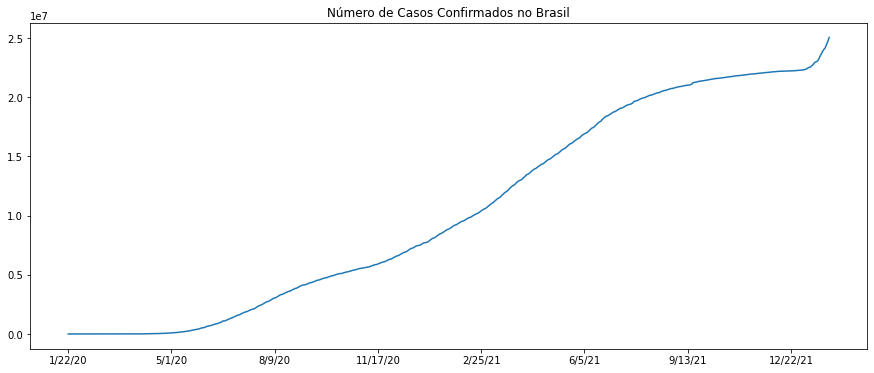

In [11]:
plt.figure(figsize=(15,6))
casos_confirmados_brasil.plot()
plt.title("Número de Casos Confirmados no Brasil")
plt.show()

Concluímos que após um período de estabilidade no 2º semestre de 2021, há um crescimento acelerado no número de casos no primeiro mês de 2022 causados pela variante ômicrom.

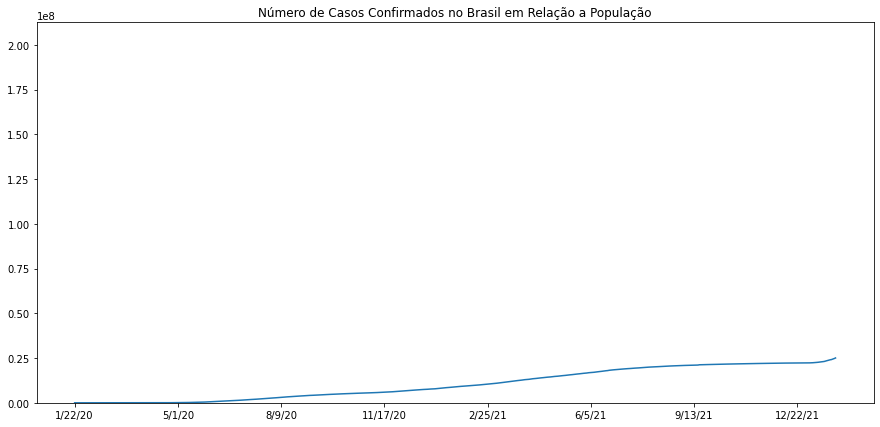

In [12]:
plt.figure(figsize=(15,7))
casos_confirmados_brasil.plot()
plt.title("Número de Casos Confirmados no Brasil em Relação a População")
plt.ylim(0, 212600000)
plt.show()

Concluímos que após 2 anos de pandemia apenas um percentual pequeno da população foi infectada e registrada, descartando uma hipótese de imunidade de rebanho.

In [58]:
novos_casos_confirmados_brasil = casos_confirmados_paises.loc["Brazil"][2:].diff().dropna()
#Descobrindo o numero de novos casos diários, fazendo a diferença entre cada coluna

In [14]:
type(novos_casos_confirmados_brasil)

pandas.core.series.Series

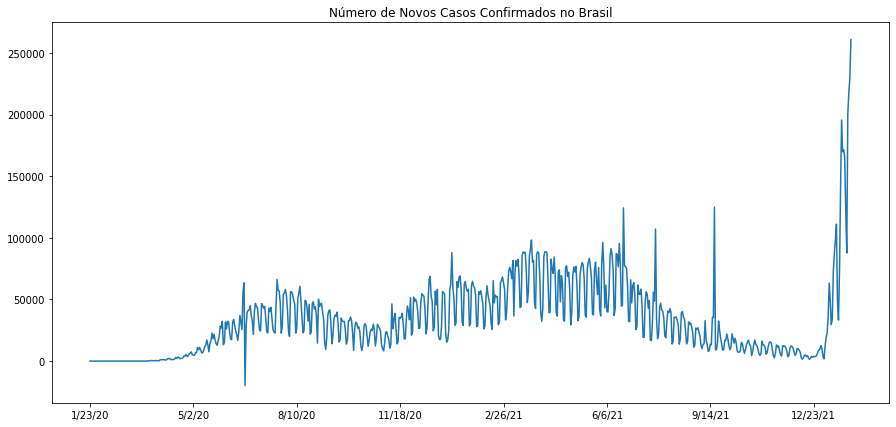

In [15]:
plt.figure(figsize=(15,7))
novos_casos_confirmados_brasil.plot()
plt.title("Número de Novos Casos Confirmados no Brasil")
plt.show()

Concluímos que o número de casos registrados no mês de Janeiro/2022 é recorde ante a qualquer período nos últimos 2 anos.

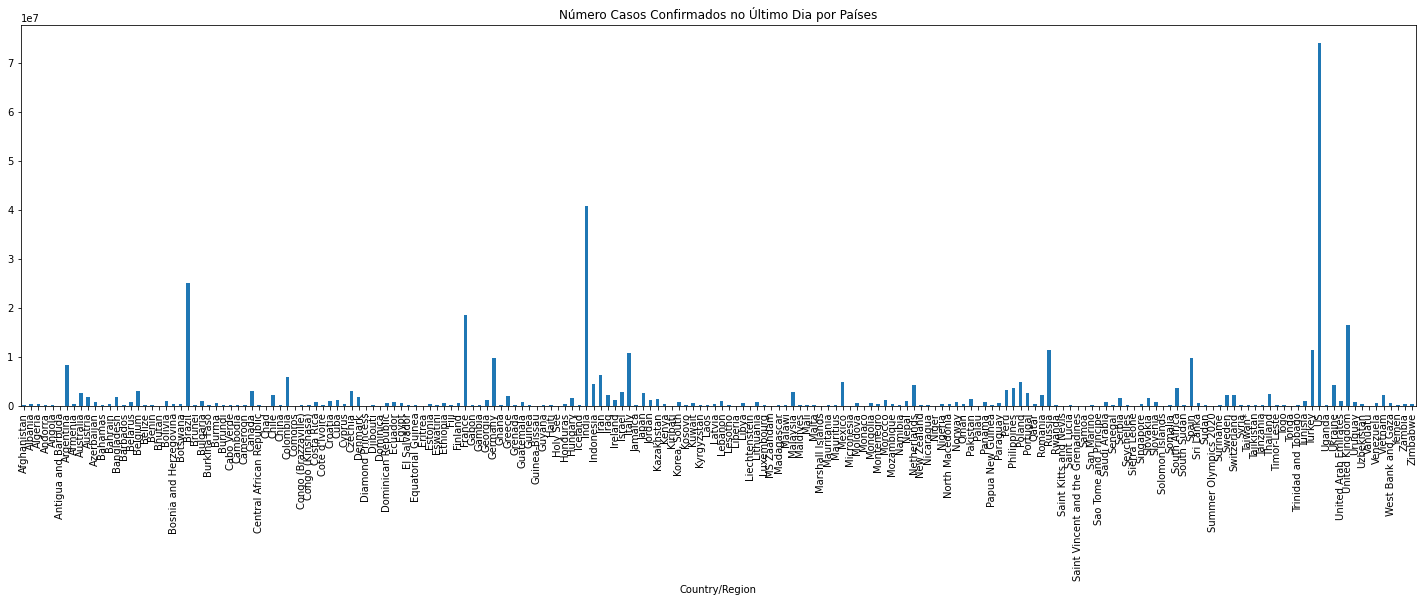

In [16]:
plt.figure(figsize=(25,7))
casos_confirmados_paises.iloc[0:,-1].plot(kind='bar')
plt.title("Número Casos Confirmados no Último Dia por Países")
plt.show()

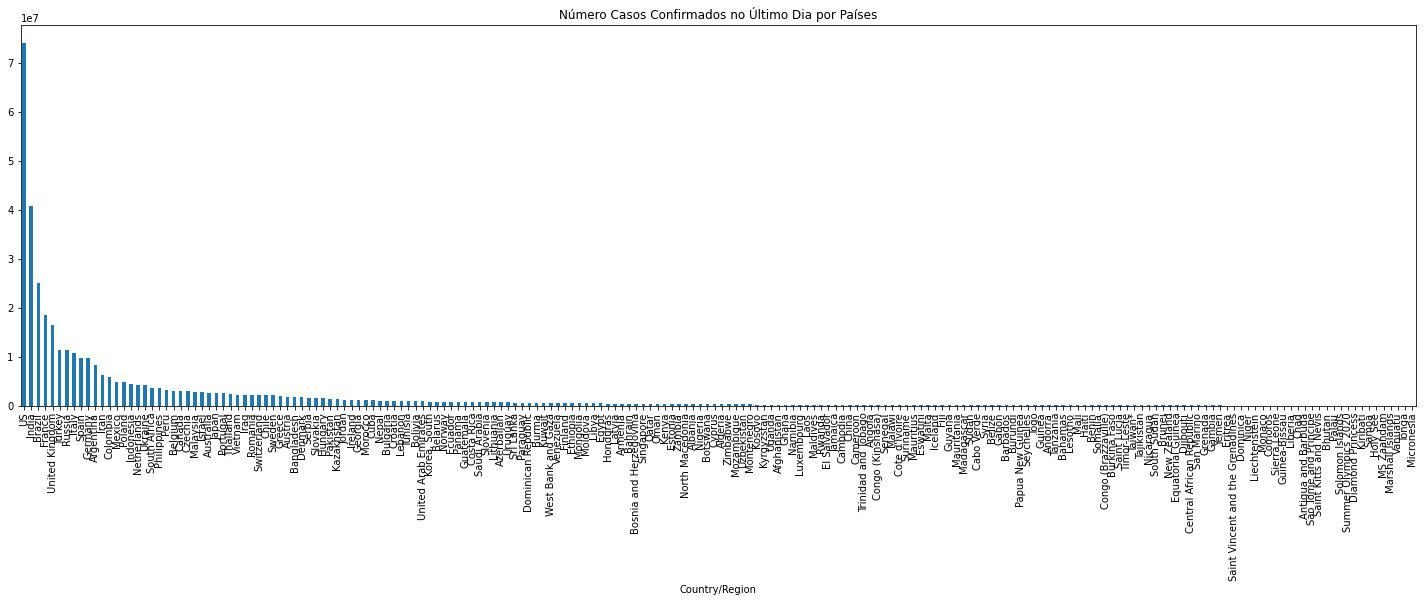

In [17]:
plt.figure(figsize=(25,7))
casos_confirmados_paises.iloc[0:,-1].sort_values(ascending=False).plot(kind='bar')
plt.title("Número Casos Confirmados no Último Dia por Países")
plt.show()

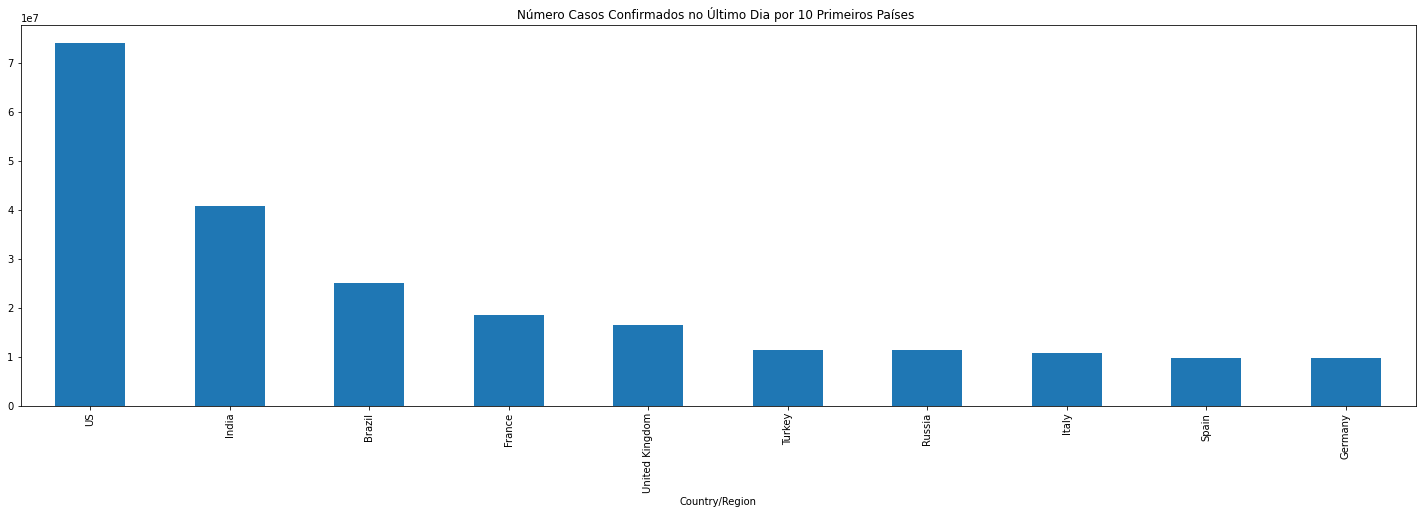

In [18]:
plt.figure(figsize=(25,7))
casos_confirmados_paises.iloc[0:,-1].sort_values(ascending=False)[0:10].plot(kind='bar')
plt.title("Número Casos Confirmados no Último Dia por 10 Primeiros Países ")
plt.show()

Concluimos que hoje Janeiro/2022 o Brasil corresponde ao 3 país com maior número de casos registrados no mundo, ficando apenas atrás dos EUA e Índia.

#Importando e Tratando Dados de Mortes e Recuperados

In [19]:
dados_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
dados_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [20]:
display(dados_mortes.sample(5))
display(dados_recuperados.sample())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
37,NaN,Cambodia,11.550000,104.916700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3005,3005,3006,3006,3007,3008,3008,3009,3010,3011,3012,3012,3012,3013,3014,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015,3015
231,NaN,Slovakia,48.669000,19.699000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,16068,16129,16198,16239,16290,16336,16398,16445,16486,16554,16598,16635,16665,16701,16740,16788,16824,16871,16896,16933,16962,16989,17039,17081,17128,17188,17252,17300,17352,17398,17459,17520,17577,17612,17643,17675,17698,17725,17755,17779
101,NaN,Czechia,49.817500,15.473000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35288,35288,35288,35288,35288,35692,35749,35805,35911,35975,36061,36129,36182,36219,36255,36326,36397,36449,36507,36558,36590,36624,36683,36765,36765,36799,36828,36853,36874,36910,36937,36972,36997,37021,37034,37050,37080,37092,37114,37145
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3684,3685,3685,3688,3691,3697,3702,3709,3716,3726,3730,3734,3740,3743,3753,3762,3772,3782,3790,3798,3812,3817,3825,3830,3834,3844,3852,3860,3866,3873,3877,3879,3885,3890,3895,3900,3905,3906,3907,3910
228,NaN,Seychelles,-4.679600,55.492000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131,131,131,131,131,131,131,131,131,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,136,136,136,136,140,140,140,143,143,143,143,143,143,143,149,149


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
74,Xinjiang,China,41.1129,85.2401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6,6,10,12,12,12,20,22,24,25,28,30,30,34,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
def ultimos_dados_por_paises(data):
  return data.groupby("Country/Region").sum().iloc[:,-1]

In [22]:
ultimos_dados_por_paises(dados_casos).head()


Country/Region
Afghanistan    161057
Albania        254126
Algeria        247568
Andorra         35556
Angola          98029
Name: 1/28/22, dtype: int64

In [23]:
ultimos_dados_por_paises(dados_mortes).head()

Country/Region
Afghanistan    7403
Albania        3329
Algeria        6545
Andorra         145
Angola         1893
Name: 1/28/22, dtype: int64

In [24]:
ultimos_dados_por_paises(dados_recuperados).head()

Country/Region
Afghanistan    0
Albania        0
Algeria        0
Andorra        0
Angola         0
Name: 1/28/22, dtype: int64

In [25]:
informacoes = [ultimos_dados_por_paises(dados_casos), ultimos_dados_por_paises(dados_mortes), ultimos_dados_por_paises(dados_recuperados)]
informacoes_combinadas = pd.concat(informacoes, axis=1)
informacoes_combinadas.columns = ["casos_confirmados", "mortes", "recuperados"]
informacoes_combinadas.sample(10)

,casos_confirmados,mortes,recuperados
Country/Region,,,
Saint Vincent and the Grenadines,9447,93,0
Indonesia,4319175,144268,0
Diamond Princess,712,13,0
Bhutan,4430,4,0
"Korea, South",811122,6712,0
Netherlands,4291437,21788,0
Azerbaijan,647073,8683,0
Jordan,1189080,13157,0
Barbados,42851,277,0


# Cálculo da Letalidade do Vírus

In [26]:
soma = informacoes_combinadas.sum()
soma

casos_confirmados    369955862
mortes                 5650738
recuperados                  0
dtype: int64

In [27]:
soma_informacoes = informacoes_combinadas.sum()
taxa_de_letalidade_1 = soma_informacoes["mortes"] / soma_informacoes["casos_confirmados"]
print((taxa_de_letalidade_1 * 100).round(2),'%')

1.53 %


Dentre todos os casos mundiais registrados e também número de mortos podemos calcular a letalidade do vírus que é de 1.53%, ou seja, de todos infectados e testados 1.53% infelizmente vão a óbito.

In [28]:
taxa_de_letalidade_2 = informacoes_combinadas["mortes"] / informacoes_combinadas["casos_confirmados"] * 100
informacoes_combinadas["taxa_letalidade"] = taxa_de_letalidade_2

In [29]:
informacoes_combinadas.sample(10)

,casos_confirmados,mortes,recuperados,taxa_letalidade
Country/Region,,,,
Luxembourg,153435,948,0,0.617851
Sweden,2070456,15855,0,0.765773
Papua New Guinea,36866,597,0,1.619378
Hungary,1508358,41229,0,2.733370
Kosovo,198327,3012,0,1.518704
Rwanda,128708,1438,0,1.117258
Dominica,8838,51,0,0.577054
Syria,51230,2982,0,5.820808
Micronesia,1,0,0,0.000000


In [30]:
informacoes_combinadas.sort_values("taxa_letalidade", ascending=False).head(40)

,casos_confirmados,mortes,recuperados,taxa_letalidade
Country/Region,,,,
MS Zaandam,9,2,0,22.222222
Yemen,10942,2006,0,18.333029
Vanuatu,7,1,0,14.285714
Peru,3120401,204940,0,6.567746
Mexico,4873561,305240,0,6.263182
Sudan,57106,3422,0,5.992365
Syria,51230,2982,0,5.820808
Egypt,419460,22522,0,5.369284
Somalia,25388,1335,0,5.258390


In [31]:
informacoes_combinadas.loc["Brazil"]

casos_confirmados    2.505060e+07
mortes               6.261700e+05
recuperados          0.000000e+00
taxa_letalidade      2.499621e+00
Name: Brazil, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


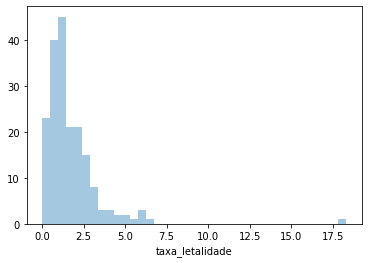

In [32]:
sns.distplot(informacoes_combinadas.query("casos_confirmados > 40")["taxa_letalidade"], kde=False)

Concluímos que mundialmente a taxa de mortalidade mais frequente de até 2,5%

## Cálculo Taxa de Letalidade Covid-19 no Brasil

In [33]:
dados_mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7335,7335,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356,7356,7361,7364,7365,7367,7367,7368,7369,7373,7373,7374,7376,7376,7376,7378,7379,7381,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403,7403
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3172,3178,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217,3217,3220,3220,3224,3224,3228,3233,3233,3240,3241,3247,3253,3255,3262,3265,3269,3271,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323,3329
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6190,6198,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276,6284,6291,6298,6303,6310,6318,6325,6330,6339,6349,6363,6372,6383,6393,6404,6412,6423,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539,6545
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137,137,138,139,139,139,139,139,140,140,140,140,140,140,140,141,141,141,141,141,141,141,141,141,141,142,142,142,142,142,142,144,144,144,144,144,145,145,145,145
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1738,1738,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770,1772,1772,1775,1778,1789,1799,1809,1819,1826,1832,1840,1842,1847,1852,1857,1863,1866,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893,1893


In [34]:
query = dados_mortes["Country/Region"] == 'Brazil'
query.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [35]:
dados_mortes_brasil = dados_mortes[query]

In [36]:
query = dados_casos["Country/Region"] == 'Brazil'
query.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [37]:
dados_casos_brasil = dados_casos[query]

In [38]:
dados_mortes_brasil.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
30,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,618149,618220,618366,618492,618655,618686,618732,618797,618978,619095,619249,619334,619367,619401,619473,619654,619654,619654,619822,619937,620251,620366,620507,620641,620830,621063,621233,621327,621478,621803,622125,622476,622875,623191,623370,623636,624129,624717,625390,626170


In [39]:
dados_diarios_mortes_brasil = dados_mortes_brasil.iloc[0:,4:-1].diff(axis=1)
dados_diarios_casos_brasil = dados_casos_brasil.iloc[0:,4:-1].diff(axis=1)


In [40]:
dados_diarios_mortes_brasil

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,83.0,71.0,146.0,126.0,163.0,31.0,46.0,65.0,181.0,117.0,154.0,85.0,33.0,34.0,72.0,181.0,0.0,0.0,168.0,115.0,314.0,115.0,141.0,134.0,189.0,233.0,170.0,94.0,151.0,325.0,322.0,351.0,399.0,316.0,179.0,266.0,493.0,588.0,673.0


In [41]:
dados_diarios_casos_brasil

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
30,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1458.0,2639.0,3734.0,3226.0,3774.0,3680.0,3674.0,4969.0,6952.0,9052.0,9761.0,12618.0,10190.0,3782.0,1806.0,11654.0,19171.0,22852.0,35826.0,63292.0,49303.0,29658.0,33921.0,73255.0,87873.0,97945.0,111112.0,48562.0,33277.0,74381.0,140342.0,195541.0,169786.0,171321.0,165110.0,122796.0,87627.0,200290.0,217771.0,229702.0


In [42]:
letalidade_diaria_covid_brasil = (dados_diarios_mortes_brasil / dados_diarios_casos_brasil * 100)

In [43]:
letalidade_diaria_covid_brasil

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,...,3.772291,3.145131,1.901446,4.525728,3.338633,4.429348,0.843767,0.92574,0.934983,1.999558,1.198648,1.220479,0.834151,0.872554,1.882614,0.617814,0.944134,0.0,0.0,0.265436,0.233252,1.058736,0.339023,0.192478,0.152493,0.192965,0.209698,0.350068,0.282477,0.203009,0.231577,0.164671,0.206731,0.232896,0.191388,0.14577,0.303559,0.246143,0.270008,0.292988


In [44]:
mortes_confirmadas_paises = dados_mortes.groupby("Country/Region").sum()

In [45]:
mortes_confirmadas_paises.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7335,7335,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356,7356,7361,7364,7365,7367,7367,7368,7369,7373,7373,7374,7376,7376,7376,7378,7379,7381,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403,7403
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3172,3178,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217,3217,3220,3220,3224,3224,3228,3233,3233,3240,3241,3247,3253,3255,3262,3265,3269,3271,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323,3329
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6190,6198,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276,6284,6291,6298,6303,6310,6318,6325,6330,6339,6349,6363,6372,6383,6393,6404,6412,6423,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539,6545
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,137,137,138,139,139,139,139,139,140,140,140,140,140,140,140,141,141,141,141,141,141,141,141,141,141,142,142,142,142,142,142,144,144,144,144,144,145,145,145,145
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1738,1738,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770,1772,1772,1775,1778,1789,1799,1809,1819,1826,1832,1840,1842,1847,1852,1857,1863,1866,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893,1893


In [46]:
novas_mortes_confirmadas_brasil = mortes_confirmadas_paises.loc["Brazil"][2:].diff().dropna()

In [47]:
novas_mortes_confirmadas_brasil.head()

1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
1/27/20    0.0
Name: Brazil, dtype: float64

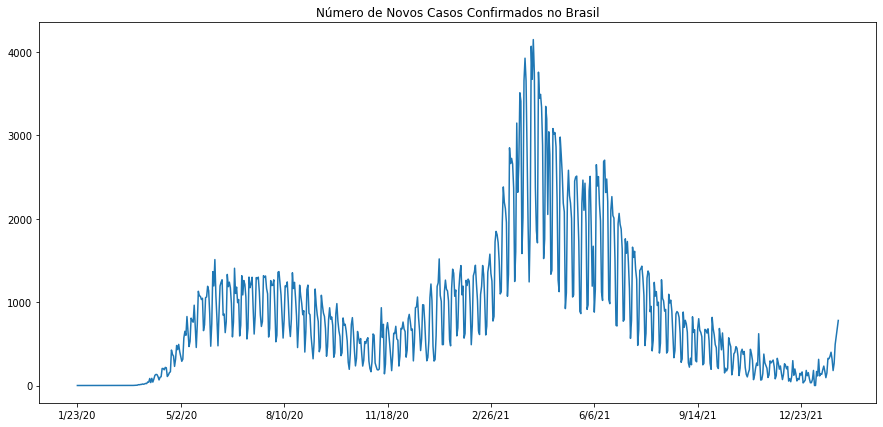

In [48]:
plt.figure(figsize=(15,7))
novas_mortes_confirmadas_brasil.plot()
plt.title("Número de Novos Casos Confirmados no Brasil")
plt.show()

In [49]:
letalidade_diaria_covid_brasil = novas_mortes_confirmadas_brasil / novos_casos_confirmados_brasil * 100

In [50]:
letalidade_diaria_covid_brasil

1/23/20         NaN
1/24/20         NaN
1/25/20         NaN
1/26/20         NaN
1/27/20         NaN
             ...   
1/24/22    0.303559
1/25/22    0.246143
1/26/22    0.270008
1/27/22    0.292988
1/28/22    0.299073
Name: Brazil, Length: 737, dtype: float64

Concuímos que nos últimos dias de Janeiro/2022 a letalidade média está entre 
0,24% e 0,30% o que demonstra a eficácia da vacinação em massa.

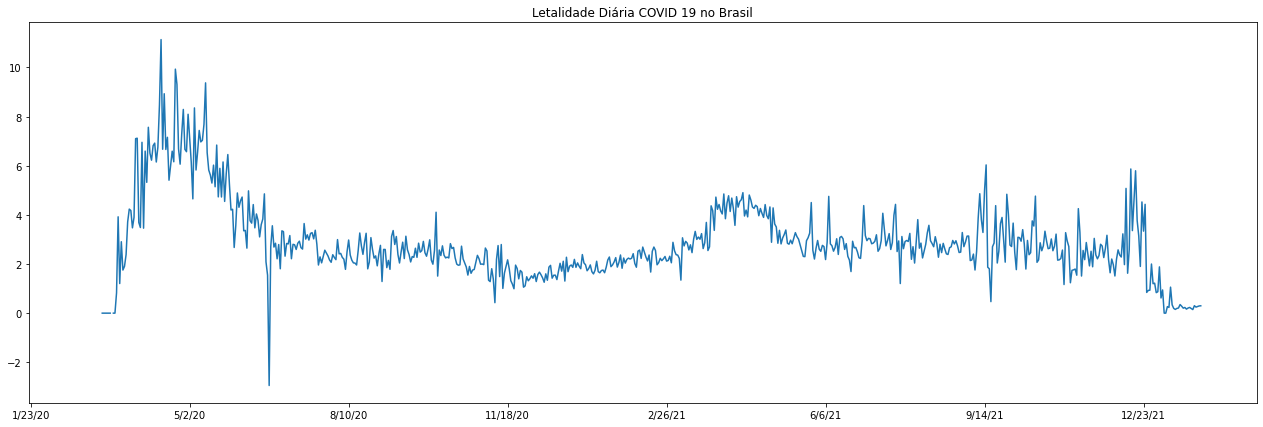

In [51]:
plt.figure(figsize=(22,7))
letalidade_diaria_covid_brasil.plot()
plt.title("Letalidade Diária COVID 19 no Brasil")
plt.show()

Concluímos que em Janeiro/2022 a letalidade do vírus é de 0,30% no Brasil, enquanto no último píco de casos esse percentual variou de 1,5% a 5%.

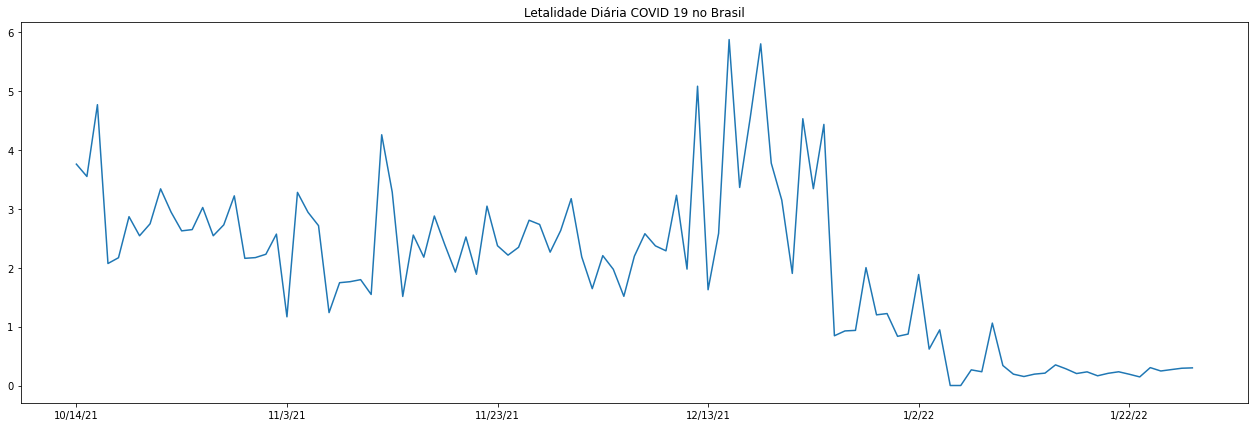

In [74]:
plt.figure(figsize=(22,7))
letalidade_diaria_covid_brasil[630:].plot()
plt.title("Letalidade Diária COVID 19 no Brasil")
plt.show()

Concluímos que após 50% da população estar completamente vacinada 18/10/21 há uma tendência de queda na letalidade do COVID19.